# Enzo Rodriguez

# Lower Star Image Filtrations for Scanning
Here I take the notebook
Lower Star Image Filtrations
from ripser.py and adjust it to create a left-to-right
scan on a letter from letters.csv and I would also perform a right-to-left scan on each letter. Then I plan on inverting the image and performing an up-to-down scan follwed by a down-to-up scan.
First let's import everything they imported.
I also import csv to read our csv file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import ndimage
import PIL
from persim import plot_diagrams
from ripser import ripser, lower_star_img 
import csv

## Left-to-right Scanning Example
Our function on the image will be very simple: if the value we see in the corresponding row is 0 then the value on the pixel is 100, if the value is 1 then the value is the x1 coordinate. I'll be scanning the leters in sequential order from A-Z first left-to-right.

(10, 10)
[[100 100 100 100   5   6 100 100 100 100]
 [100 100 100 100   5   6 100 100 100 100]
 [100 100 100   4   5   6 100 100 100 100]
 [100 100 100   4   5   6   7 100 100 100]
 [100 100 100   4 100   6   7 100 100 100]
 [100 100   3   4   5   6   7 100 100 100]
 [100 100   3 100 100 100   7 100 100 100]
 [100   2   3 100 100 100   7   8 100 100]
 [100   2 100 100 100 100 100   8 100 100]
 [100 100 100 100 100 100 100 100 100 100]]


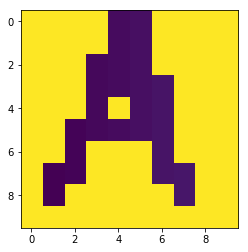

In [2]:
from numpy import genfromtxt 
import numpy as np
# read in file of letters

# read in file of letters
letters = genfromtxt('letters.csv', delimiter=',') # take first letter
letter_one_line=letters[0,:]

# initialize matrix of size 10x10 with all values 100
letter=np.full((10, 10), 100)

# convert one line letter to 10x10 matrix replacing zeros with 100
for k in range(1,101):
    if letter_one_line[k]==1.0:
        row=int((k-1)/10) 
        column=(k-1)%10 
        letter[row,column]=k%10
print(letter.shape)
print(letter)

plt.imshow(letter)
plt.show()

[[ 2. inf]]


/Users/enzo/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2.0, right=2.0
  'left=%s, right=%s') % (left, right))
/Users/enzo/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2.0, top=2.0
  'bottom=%s, top=%s') % (bottom, top))


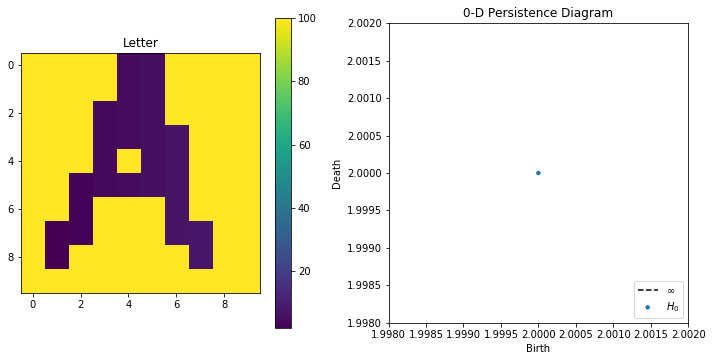

In [3]:
dgm = lower_star_img(letter)
print(dgm)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(letter)
plt.colorbar()
plt.title("Letter")
plt.subplot(122)
plot_diagrams(dgm)
plt.title("0-D Persistence Diagram")
plt.tight_layout()
plt.show()

In [4]:
help(lower_star_img)

Help on function lower_star_img in module ripser.ripser:

lower_star_img(img)
    Construct a lower star filtration on an image
    
    Parameters
    ----------
    img: ndarray (M, N)
        An array of single channel image data
    
    Returns
    -------
    I: ndarray (K, 2)
        A 0-dimensional persistence diagram corresponding to the sublevelset filtration



(1, 2)
[[ 2. inf]]


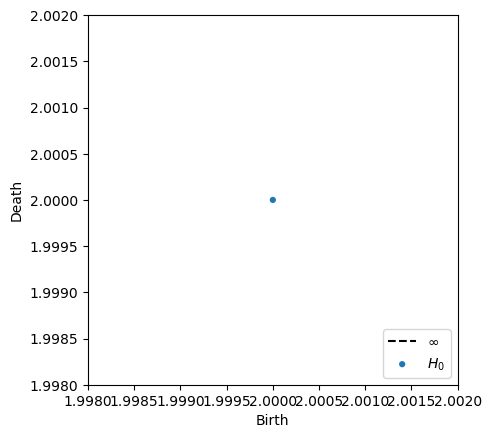

In [6]:
dgm = lower_star_img(letter)
print(dgm.shape)
print(dgm)
plot_diagrams(dgm)

plt.show()

## Right-to-left Scanning Example
Our function on the image will be very simple: if the value we see in the corresponding row is 0 then the value on the pixel is 100, if the value is 1 then the value is the x1 coordinate.
I'll be scanning the leters in sequential order from A-Z right-to-left.

(10, 10)
[[100 100   7   6   5   4 100 100 100 100]
 [100 100   7 100 100   4   3 100 100 100]
 [100 100   7 100 100   4   3 100 100 100]
 [100 100   7   6   5   4 100 100 100 100]
 [100 100   7   6   5   4   3   2 100 100]
 [100 100   7 100 100 100   3   2 100 100]
 [100 100   7 100 100 100 100   2 100 100]
 [100 100   7 100 100   4   3   2 100 100]
 [100 100   7   6   5   4 100 100 100 100]
 [100 100 100 100 100 100 100 100 100 100]]


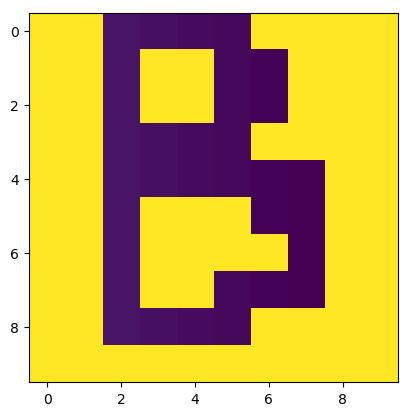

In [6]:
from numpy import genfromtxt 
import numpy as np
# read in file of letters

# read in file of letters
letters = genfromtxt('letters.csv', delimiter=',') # take first letter
letter_one_line=letters[1,:]

# initialize matrix of size 10x10 with all values 100
letter=np.full((10, 10), 100)

# convert one line letter to 10x10 matrix replacing zeros with 100
for k in range(1,101):
    if letter_one_line[k]==1.0:
        row=int((k-1)/10) 
        column=(k-1)%10 
        letter[row,column]=10-k%10 #this portion is how to scan the images right-to-left
print(letter.shape)
print(letter)

plt.imshow(letter)
plt.show()

[[ 3.  4.]
 [ 2. inf]]


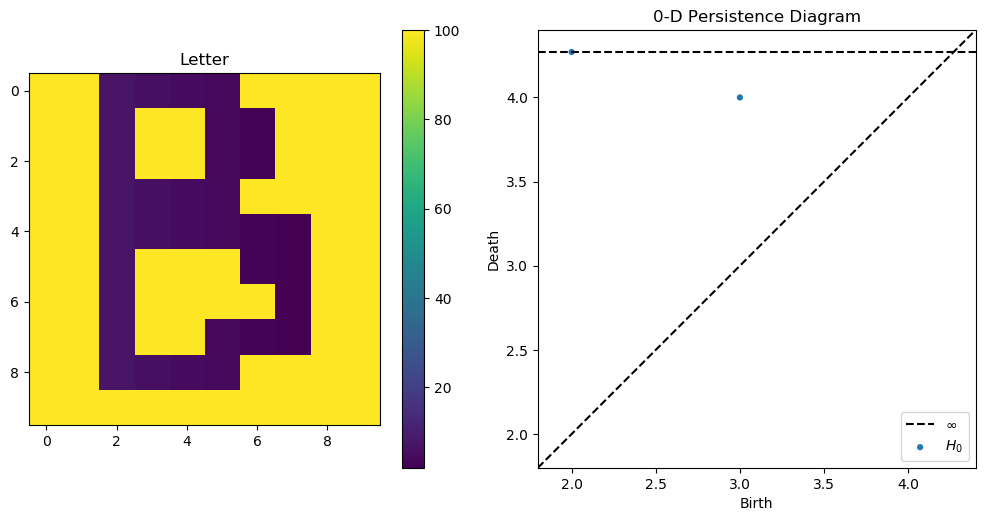

In [7]:
dgm = lower_star_img(letter)
print(dgm)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(letter)
plt.colorbar()
plt.title("Letter")
plt.subplot(122)
plot_diagrams(dgm)
plt.title("0-D Persistence Diagram")
plt.tight_layout()
plt.show()

(2, 2)
[[ 3.  4.]
 [ 2. inf]]


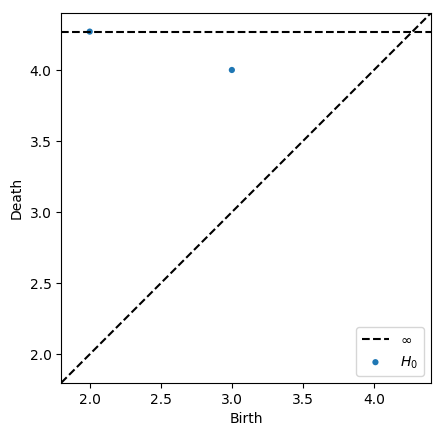

In [8]:
dgm = lower_star_img(letter)
print(dgm.shape)
print(dgm)
plot_diagrams(dgm)

plt.show()

## Down-to-up Scanning Example
Our function on the image will be very simple: if the value we see in the corresponding row is 0 then the value on the pixel is 100, if the value is 1 then the value is the x1 coordinate. I’ll be scanning the leters in sequential order from A-Z first left-to-right inverted, which is down-to-up.

(10, 10)
[[100 100 100 100 100 100 100 100 100 100]
 [100 100 100 100   2   2 100 100 100 100]
 [100 100   3   3   3   3   3   3 100 100]
 [100   4   4 100 100 100   4   4 100 100]
 [100   5 100 100 100 100 100   5 100 100]
 [100   6 100 100 100 100 100   6 100 100]
 [100   7 100 100 100 100 100   7   7 100]
 [100   8 100 100 100 100 100   8 100 100]
 [100 100 100 100 100 100 100 100 100 100]
 [100 100 100 100 100 100 100 100 100 100]]


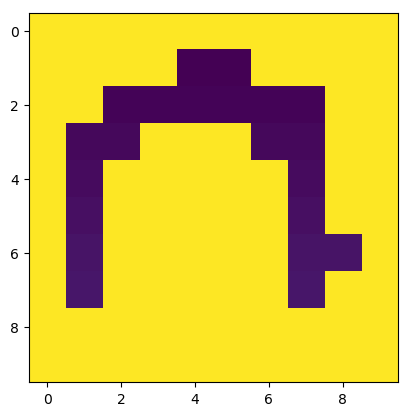

In [9]:
from numpy import genfromtxt
import numpy as np
# read in file of letters

# read in file of letters
letters = genfromtxt('letters.csv', delimiter=',') # take first letter
letter_one_line=letters[2,:]

# initialize matrix of size 10x10 with all values 100
letter=np.full((10, 10), 100)

# convert one line letter to 10x10 matrix replacing zeros with 100
for k in range(1,101):
    if letter_one_line[k]==1.0:
        row=int((k-1)%10)
        column=(k-1)/10
        letter[row,column]=k%10
print(letter.shape)
print(letter)

plt.imshow(letter)
plt.show()

[[ 2. inf]]


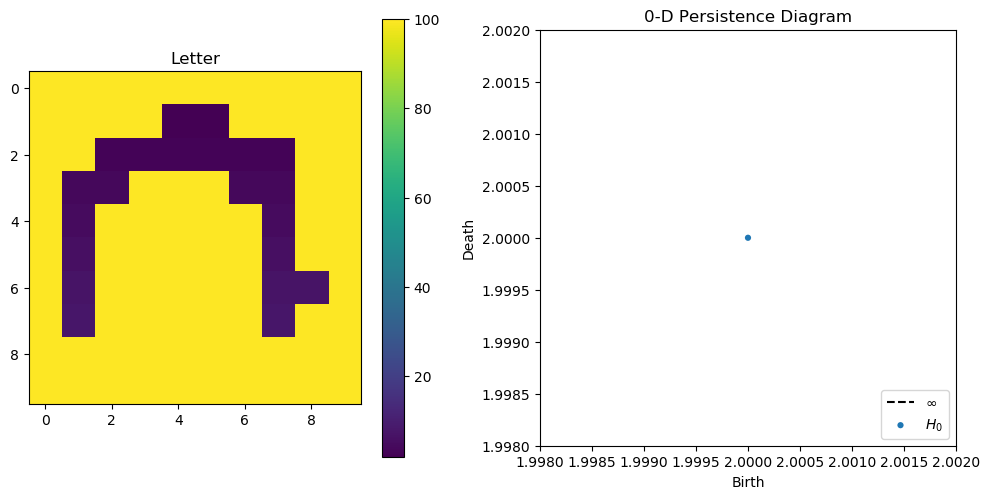

In [10]:
dgm = lower_star_img(letter)
print(dgm)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(letter)
plt.colorbar()
plt.title("Letter")
plt.subplot(122)
plot_diagrams(dgm)
plt.title("0-D Persistence Diagram")
plt.tight_layout()
plt.show()

(1, 2)
[[ 2. inf]]


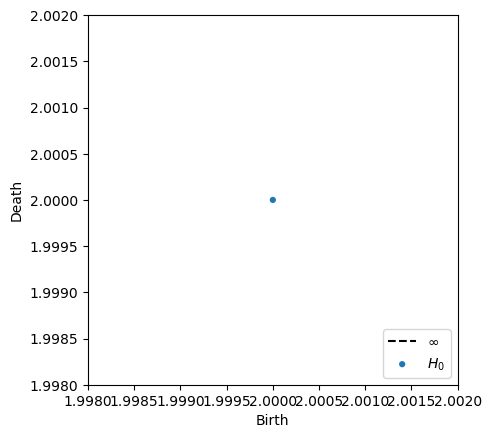

In [11]:
dgm = lower_star_img(letter)
print(dgm.shape)
print(dgm)
plot_diagrams(dgm)

plt.show()

## Up-to-down Inverted Scanning Example
Our function on the image will be very simple: if the value we see in the corresponding row is 0 then the value on the pixel is 100, if the value is 1 then the value is the x1 coordinate. I’ll be scanning the leters in sequential order from A-Z right-to-left inverted, which is up-to-down.

(10, 10)
[[100 100 100 100 100 100 100 100 100 100]
 [100 100 100 100 100 100 100 100 100 100]
 [100   7   7   7   7   7   7   7   7 100]
 [100   6 100 100 100 100 100 100   6 100]
 [100   5 100 100 100 100 100 100   5 100]
 [100   4 100 100 100 100 100   4   4 100]
 [100   3   3 100 100 100 100   3   3 100]
 [100 100   2   2   2   2   2   2 100 100]
 [100 100 100 100   1   1   1 100 100 100]
 [100 100 100 100 100 100 100 100 100 100]]


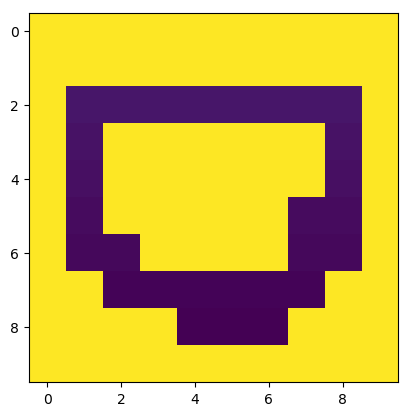

In [12]:
from numpy import genfromtxt
import numpy as np
# read in file of letters

# read in file of letters
letters = genfromtxt('letters.csv', delimiter=',') # take first letter
letter_one_line=letters[3,:]

# initialize matrix of size 10x10 with all values 100
letter=np.full((10, 10), 100)

# convert one line letter to 10x10 matrix replacing zeros with 100
for k in range(1,101):
    if letter_one_line[k]==1.0:
        row=int((k-1)%10)
        column=(k-1)/10
        letter[row,column]=10-k%10
print(letter.shape)
print(letter)

plt.imshow(letter)
plt.show()

[[ 1. inf]]


/Users/enzo/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/Users/enzo/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


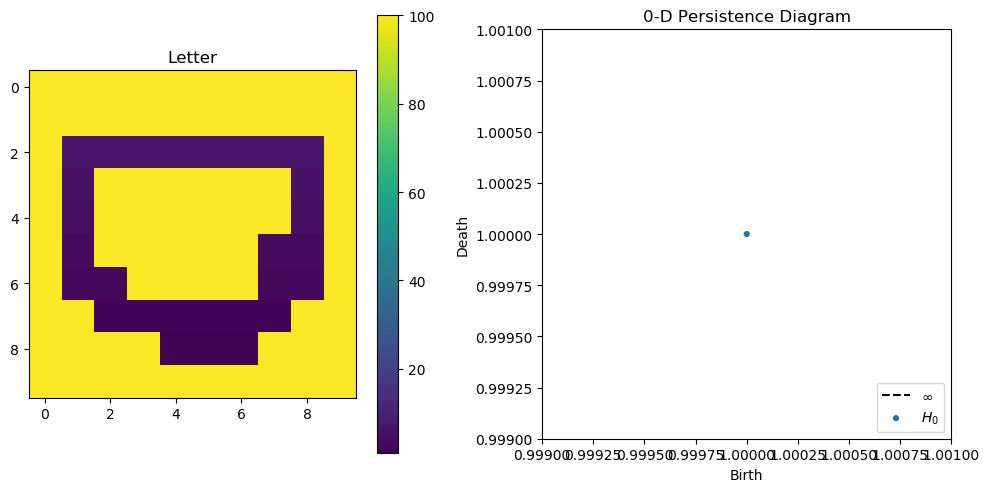

In [13]:
dgm = lower_star_img(letter)
print(dgm)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(letter)
plt.colorbar()
plt.title("Letter")
plt.subplot(122)
plot_diagrams(dgm)
plt.title("0-D Persistence Diagram")
plt.tight_layout()
plt.show()

(1, 2)
[[ 1. inf]]


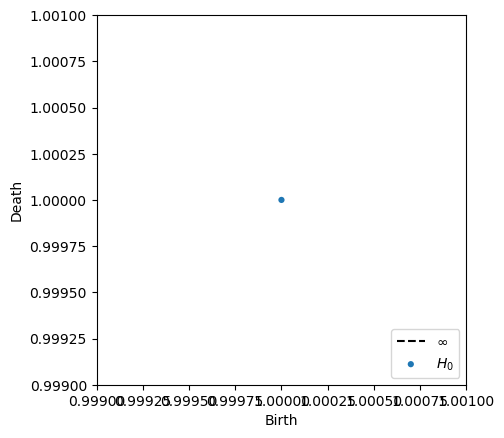

In [14]:
dgm = lower_star_img(letter)
print(dgm.shape)
print(dgm)
plot_diagrams(dgm)

plt.show()

## Angle Scanning Example

(10, 10)
[[100 100 100 100 100 100 100 100 100 100]
 [100 100   3   4   5   6   7   8 100 100]
 [100 100   3 100 100 100 100 100 100 100]
 [100 100   3 100 100 100 100 100 100 100]
 [100 100   3   4   5   6   7   8 100 100]
 [100 100   3 100 100 100 100 100 100 100]
 [100 100   3 100 100 100 100 100 100 100]
 [100 100   3 100 100 100 100 100 100 100]
 [100 100   3   4   5   6   7   8 100 100]
 [100 100 100 100 100 100 100 100 100 100]]


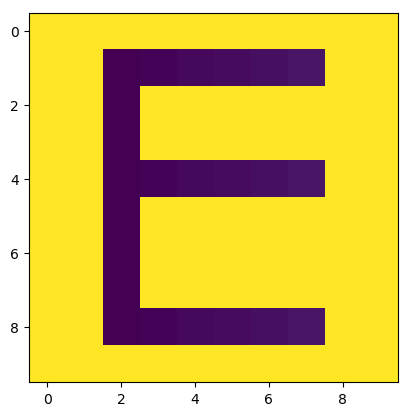

In [15]:
from numpy import genfromtxt 
import numpy as np
# read in file of letters

# read in file of letters
letters = genfromtxt('letters.csv', delimiter=',') # take first letter
letter_one_line=letters[4,:]

# initialize matrix of size 10x10 with all values 100
letter=np.full((10, 10), 100)

# convert one line letter to 10x10 matrix replacing zeros with 100
for k in range(1,101):
    if letter_one_line[k]==1.0:
        row=int((k-1)/10) 
        column=(k-1)%10 
        letter[row,column]=max(k%10,int(k-1)%10)
print(letter.shape)
print(letter)

plt.imshow(letter)
plt.show()

[[ 3. inf]]


/Users/enzo/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=3.0, right=3.0
  'left=%s, right=%s') % (left, right))
/Users/enzo/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=3.0, top=3.0
  'bottom=%s, top=%s') % (bottom, top))


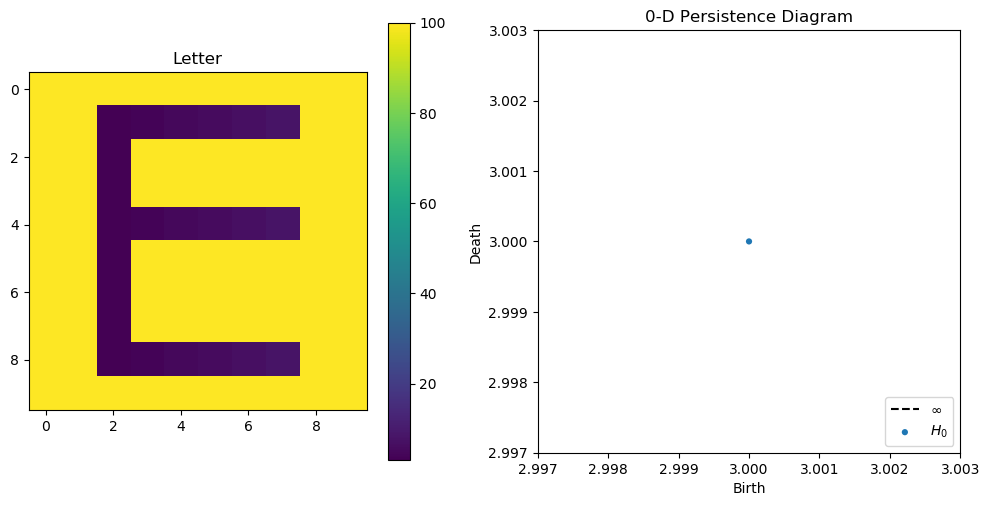

In [16]:
dgm = lower_star_img(letter)
print(dgm)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(letter)
plt.colorbar()
plt.title("Letter")
plt.subplot(122)
plot_diagrams(dgm)
plt.title("0-D Persistence Diagram")
plt.tight_layout()
plt.show()

(1, 2)
[[ 3. inf]]


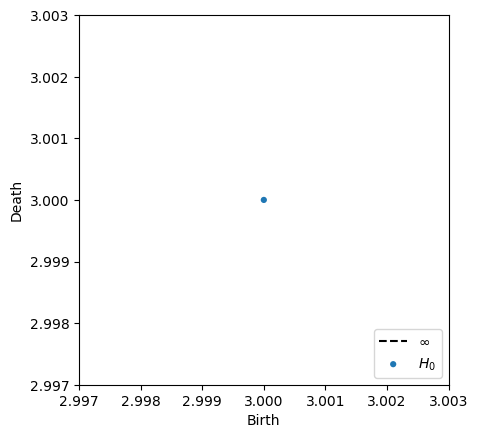

In [17]:
dgm = lower_star_img(letter)
print(dgm.shape)
print(dgm)
plot_diagrams(dgm)

plt.show()

## Diagonal Scanning Example

(10, 10)
[[100 100 100 100 100 100 100 100 100 100]
 [100 100   9   6   5   6   9 100 100 100]
 [100 100   2 100 100 100 100 100 100 100]
 [100 100   5 100 100 100 100 100 100 100]
 [100 100   8   8   0   4   0 100 100 100]
 [100 100   1 100 100 100 100 100 100 100]
 [100 100   4 100 100 100 100 100 100 100]
 [100 100   7 100 100 100 100 100 100 100]
 [100 100   0 100 100 100 100 100 100 100]
 [100 100 100 100 100 100 100 100 100 100]]


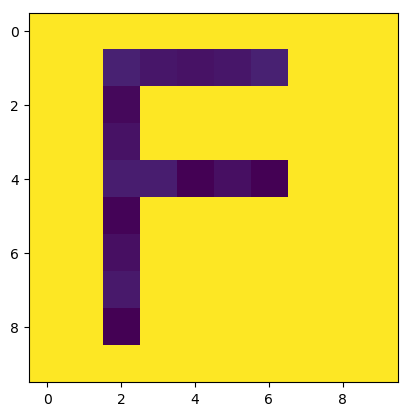

In [18]:
from numpy import genfromtxt 
import numpy as np
# read in file of letters

# read in file of letters
letters = genfromtxt('letters.csv', delimiter=',') # take first letter
letter_one_line=letters[5,:]

# initialize matrix of size 10x10 with all values 100
letter=np.full((10, 10), 100)

# convert one line letter to 10x10 matrix replacing zeros with 100
for k in range(1,101):
    if letter_one_line[k]==1.0:
        row=int((k-1)/10) 
        column=(k-1)%10 
        letter[row,column]=(column+row)*k%10
print(letter.shape)
print(letter)

plt.imshow(letter)
plt.show()

[[ 0.  4.]
 [ 5.  6.]
 [ 1.  7.]
 [ 0.  8.]
 [ 2.  8.]
 [ 0. inf]]


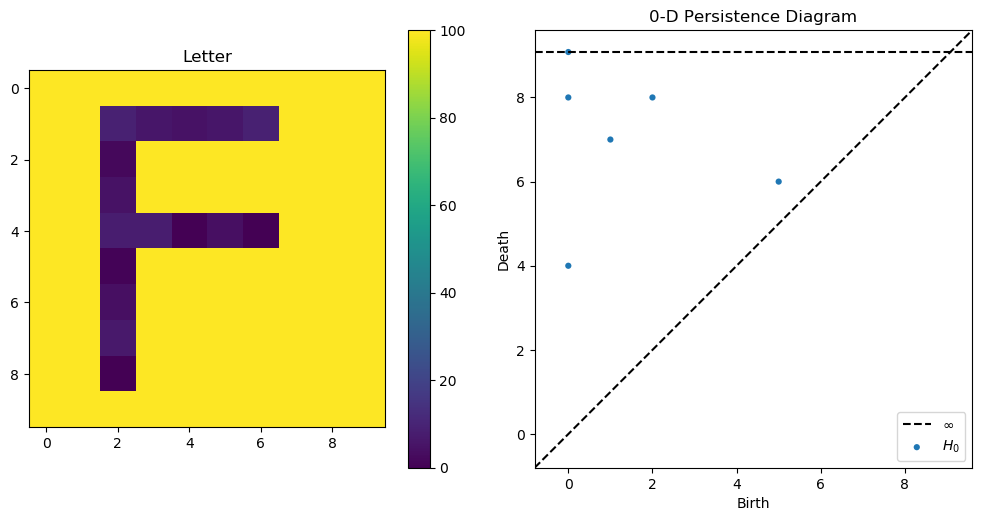

In [19]:
dgm = lower_star_img(letter)
print(dgm)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(letter)
plt.colorbar()
plt.title("Letter")
plt.subplot(122)
plot_diagrams(dgm)
plt.title("0-D Persistence Diagram")
plt.tight_layout()
plt.show()

(6, 2)
[[ 0.  4.]
 [ 5.  6.]
 [ 1.  7.]
 [ 0.  8.]
 [ 2.  8.]
 [ 0. inf]]


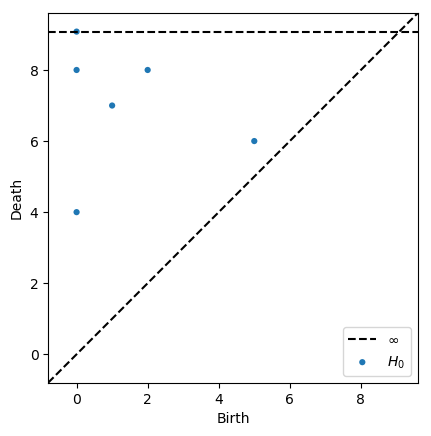

In [20]:
dgm = lower_star_img(letter)
print(dgm.shape)
print(dgm)
plot_diagrams(dgm)

plt.show()

# Looping through all the letters in every direction

In [3]:
# Left-to-right scanning through loops
letters = genfromtxt('letters.csv', delimiter=',') # Upload the file

dgmLR = [None]*26 #Initialize an empty list
for i in range(26):
    letter_one_line=letters[i,:]

    # initialize matrix of size 10x10 with all values 100
    letter=np.full((10, 10), 100)

    # convert one line letter to 10x10 matrix replacing zeros with 100
    for k in range(1,101):
        if letter_one_line[k]==1.0:
            row=int((k-1)/10) 
            column=(k-1)%10 
            letter[row,column]=k%10            
    dgmLR[i] = lower_star_img(letter)

In [6]:
# Print A-Z diagrams
print(dgmLR[0:25])

[array([[ 2., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 3., inf]]), array([[ 3., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 3., inf]]), array([[ 4.,  5.],
       [ 4., inf]]), array([[ 4.,  6.],
       [ 4., inf]]), array([[ 3., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 3., inf]]), array([[ 6.,  7.],
       [ 2., inf]]), array([[ 3., inf]]), array([[ 3.,  8.],
       [ 3., inf]]), array([[ 2., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 3.,  4.],
       [ 3., inf]]), array([[ 3., inf]])]


In [23]:
# Print A digram
print(dgmLR[0])

[[ 2. inf]]


In [24]:
# Print z diagram
print(dgmLR[25])

[[ 3.  7.]
 [ 2. inf]]


In [25]:
# Right-to-left scanning through loops
letters = genfromtxt('letters.csv', delimiter=',') # Upload the file

dgmRL = [None]*26 #Initialize an empty list
for i in range(26):
    letter_one_line=letters[i,:]

    # initialize matrix of size 10x10 with all values 100
    letter=np.full((10, 10), 100)

    # convert one line letter to 10x10 matrix replacing zeros with 100
    for k in range(1,101):
        if letter_one_line[k]==1.0:
            row=int((k-1)/10) 
            column=(k-1)%10 
            letter[row,column]=10-k%10            
    dgmRL[i] = lower_star_img(letter)

In [26]:
# Print A-Z diagrams
print(dgmRL[0:25])

[array([[ 2., inf]]), array([[ 3.,  4.],
       [ 2., inf]]), array([[ 2.,  7.],
       [ 2., inf]]), array([[ 1., inf]]), array([[ 2.,  7.],
       [ 2.,  7.],
       [ 2., inf]]), array([[ 3.,  7.],
       [ 3., inf]]), array([[ 3.,  7.],
       [ 3., inf]]), array([[ 3., inf]]), array([[ 4.,  5.],
       [ 4., inf]]), array([[ 4., inf]]), array([[ 3.,  6.],
       [ 3., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 3.,  5.],
       [ 3., inf]]), array([[ 2.,  7.],
       [ 2., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 1., inf]]), array([[ 3.,  5.],
       [ 3., inf]]), array([[ 3., inf]])]


In [27]:
# Print A diagram 
print(dgmRL[0])

[[ 2. inf]]


In [28]:
# Print Z diagram
print(dgmRL[25])

[[ 2.  6.]
 [ 2. inf]]


In [29]:
# Down-to-up scanning through loops
letters = genfromtxt('letters.csv', delimiter=',') # Upload the file

dgmDU = [None]*26 #Initialize an empty list
for i in range(26):
    letter_one_line=letters[i,:]

    # initialize matrix of size 10x10 with all values 100
    letter=np.full((10, 10), 100)

    # convert one line letter to 10x10 matrix replacing zeros with 100
    for k in range(1,101):
        if letter_one_line[k]==1.0:
            row=int((k-1)%10) 
            column=(k-1)/10 
            letter[row,column]=k%10            
    dgmDU[i] = lower_star_img(letter)

In [30]:
# Print A-Z diagrams
print(dgmDU[0:25])

[array([[ 2., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 3., inf]]), array([[ 3., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 3., inf]]), array([[ 4.,  5.],
       [ 4., inf]]), array([[ 4.,  6.],
       [ 4., inf]]), array([[ 3., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 3., inf]]), array([[ 6.,  7.],
       [ 2., inf]]), array([[ 3., inf]]), array([[ 3.,  8.],
       [ 3., inf]]), array([[ 2., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 3.,  4.],
       [ 3., inf]]), array([[ 3., inf]])]


In [31]:
# Print A diagram 
print(dgmDU[0])

[[ 2. inf]]


In [32]:
# Print Z diagram 
print(dgmDU[25])

[[ 3.  7.]
 [ 2. inf]]


In [33]:
# Up-to-down scanning through loops
letters = genfromtxt('letters.csv', delimiter=',') # Upload the file

dgmUD = [None]*26 #Initialize an empty list
for i in range(26):
    letter_one_line=letters[i,:]

    # initialize matrix of size 10x10 with all values 100
    letter=np.full((10, 10), 100)

    # convert one line letter to 10x10 matrix replacing zeros with 100
    for k in range(1,101):
        if letter_one_line[k]==1.0:
            row=int((k-1)%10) 
            column=(k-1)/10 
            letter[row,column]=10-k%10            
    dgmUD[i] = lower_star_img(letter)

In [34]:
# Print A-Z diagrams
print(dgmUD[0:25])

[array([[ 2., inf]]), array([[ 3.,  4.],
       [ 2., inf]]), array([[ 2.,  7.],
       [ 2., inf]]), array([[ 1., inf]]), array([[ 2.,  7.],
       [ 2.,  7.],
       [ 2., inf]]), array([[ 3.,  7.],
       [ 3., inf]]), array([[ 3.,  7.],
       [ 3., inf]]), array([[ 3., inf]]), array([[ 4.,  5.],
       [ 4., inf]]), array([[ 4., inf]]), array([[ 3.,  6.],
       [ 3., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 3.,  5.],
       [ 3., inf]]), array([[ 2.,  7.],
       [ 2., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 1., inf]]), array([[ 3.,  5.],
       [ 3., inf]]), array([[ 3., inf]])]


In [35]:
# Print A diagram
print(dgmUD[0])

[[ 2. inf]]


In [36]:
# Print Z diagram
print(dgmUD[25])

[[ 2.  6.]
 [ 2. inf]]


In [37]:
# Angle scanning through loops
letters = genfromtxt('letters.csv', delimiter=',') # Upload the file

dgmAngle = [None]*26 #Initialize an empty list
for i in range(26):
    letter_one_line=letters[i,:]

    # initialize matrix of size 10x10 with all values 100
    letter=np.full((10, 10), 100)

    # convert one line letter to 10x10 matrix replacing zeros with 100
    for k in range(1,101):
        if letter_one_line[k]==1.0:
            row=int((k-1)/10) 
            column=(k-1)%10 
            letter[row,column]=max(k%10,int(k-1)%10)            
    dgmAngle[i] = lower_star_img(letter)

In [38]:
# Print A-Z diagrams
print(dgmAngle[0:25])

[array([[ 2., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 3., inf]]), array([[ 3., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 3., inf]]), array([[ 4.,  5.],
       [ 4., inf]]), array([[ 4.,  6.],
       [ 4., inf]]), array([[ 3., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 3., inf]]), array([[ 6.,  7.],
       [ 2., inf]]), array([[ 3., inf]]), array([[ 3.,  8.],
       [ 3., inf]]), array([[ 2., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 3.,  4.],
       [ 3., inf]]), array([[ 3., inf]])]


In [39]:
# Print A digram
print(dgmAngle[0])

[[ 2. inf]]


In [40]:
# Print z diagram
print(dgmAngle[25])

[[ 3.  7.]
 [ 2. inf]]


In [41]:
# Diagonal scanning through loops
letters = genfromtxt('letters.csv', delimiter=',') # Upload the file

dgmDiagonal = [None]*26 #Initialize an empty list
for i in range(26):
    letter_one_line=letters[i,:]

    # initialize matrix of size 10x10 with all values 100
    letter=np.full((10, 10), 100)

    # convert one line letter to 10x10 matrix replacing zeros with 100
    for k in range(1,101):
        if letter_one_line[k]==1.0:
            row=int((k-1)/10) 
            column=(k-1)%10 
            letter[row,column]=(column+row)*k%10            
    dgmDiagonal[i] = lower_star_img(letter)

In [42]:
# Print A-Z diagrams
print(dgmDiagonal[0:25])

[array([[ 0.,  3.],
       [ 0.,  4.],
       [ 1.,  5.],
       [ 0.,  5.],
       [ 0., inf]]), array([[ 1.,  2.],
       [ 0.,  4.],
       [ 0.,  4.],
       [ 2.,  4.],
       [ 2.,  5.],
       [ 0.,  6.],
       [ 0.,  6.],
       [ 1.,  7.],
       [ 0., inf]]), array([[ 0.,  4.],
       [ 1.,  5.],
       [ 0.,  5.],
       [ 4.,  9.],
       [ 0., inf]]), array([[ 1.,  2.],
       [ 0.,  4.],
       [ 5.,  6.],
       [ 2.,  6.],
       [ 1.,  7.],
       [ 0.,  8.],
       [ 0., inf]]), array([[ 0.,  4.],
       [ 0.,  4.],
       [ 5.,  6.],
       [ 1.,  7.],
       [ 0.,  8.],
       [ 0.,  8.],
       [ 2.,  8.],
       [ 4.,  9.],
       [ 0., inf]]), array([[ 0.,  4.],
       [ 5.,  6.],
       [ 1.,  7.],
       [ 0.,  8.],
       [ 2.,  8.],
       [ 0., inf]]), array([[ 1.,  4.],
       [ 0.,  4.],
       [ 0.,  5.],
       [ 2.,  5.],
       [ 5.,  6.],
       [ 0., inf]]), array([[ 1.,  7.],
       [ 2.,  8.],
       [ 1.,  8.],
       [ 0., inf]]), array([[ 0.,  

In [43]:
# Print A digram
print(dgmDiagonal[0])

[[ 0.  3.]
 [ 0.  4.]
 [ 1.  5.]
 [ 0.  5.]
 [ 0. inf]]


In [44]:
# Print z diagram
print(dgmDiagonal[25])

[[ 2.  4.]
 [ 0.  5.]
 [ 5.  6.]
 [ 0.  8.]
 [ 4.  9.]
 [ 0. inf]]
